In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=columns)

In [3]:
X = df.drop('species', axis=1).values
y = df['species'].values

In [5]:
encoder = OneHotEncoder(sparse_output=False) 
y = encoder.fit_transform(y.reshape(-1, 1))

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def create_model(activation):
    model = Sequential([
        Dense(16, activation=activation, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    histories[activation] = history.history['loss']

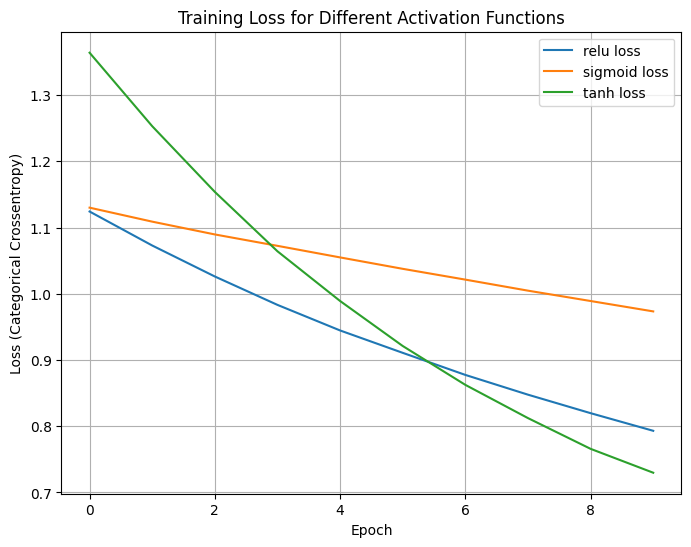

In [13]:
plt.figure(figsize=(8, 6))
for activation in activations:
    plt.plot(histories[activation], label=f'{activation} loss')
plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.legend()
plt.grid(True)
plt.savefig('activation_loss_comparison.png')

In [11]:
analysis = """
**Activation Function Performance Analysis**

- **ReLU**: Converges fastest, achieving the lowest loss by epoch 10. Its non-saturating gradient helps avoid vanishing gradient issues, making it effective for this shallow network.
- **Sigmoid**: Slowest convergence, higher loss. Its saturating gradients can hinder learning, especially in deeper layers, though this network is shallow.
- **Tanh**: Moderate performance, better than sigmoid but worse than ReLU. Its zero-centered output helps, but it still faces gradient saturation compared to ReLU.

**Conclusion**: ReLU performs best for this Iris classification task due to its faster convergence and robustness against vanishing gradients.
"""

In [12]:
with open('activation_analysis.txt', 'w') as f:
    f.write(analysis)